In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
from model_generation import generate_model

model = generate_model()

C:\Users\Thomas\Anaconda3\envs\tensorflowgpu\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\Users\Thomas\Documents\Networks\math276\Thomas\model_generation.py:52: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(1, 28, 28..., activation="relu")`
  model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(1,28,28)))
C:\Users\Thomas\Documents\Networks\math276\Thomas\model_generation.py:53: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  model.add(Convolution2D(32, 3, 3, activation='relu'))
C:\Users\Thomas\Anaconda3\envs\tensorflowgpu\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been

Epoch 1/10
60000/60000 [==============================] - 41s 682us/step - loss: 0.2008 - acc: 0.9378
Epoch 2/10
60000/60000 [==============================] - 40s 661us/step - loss: 0.0846 - acc: 0.9747
Epoch 3/10
60000/60000 [==============================] - 40s 665us/step - loss: 0.0632 - acc: 0.9809
Epoch 4/10
60000/60000 [==============================] - 39s 642us/step - loss: 0.0523 - acc: 0.9842
Epoch 5/10
60000/60000 [==============================] - 42s 707us/step - loss: 0.0458 - acc: 0.98571s - 
Epoch 6/10
60000/60000 [==============================] - 43s 725us/step - loss: 0.0403 - acc: 0.9876
Epoch 7/10
60000/60000 [==============================] - 38s 636us/step - loss: 0.0358 - acc: 0.9886
Epoch 8/10
60000/60000 [==============================] - 38s 638us/step - loss: 0.0305 - acc: 0.9899
Epoch 9/10
60000/60000 [==============================] - 38s 636us/step - loss: 0.0299 - acc: 0.9905
Epoch 10/10
60000/60000 [==============================] - 38s 635us/step - l

In [3]:
model3 = generate_model(noise=True)

C:\Users\Thomas\Documents\Networks\math276\Thomas\model_generation.py:52: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(1, 28, 28..., activation="relu")`
  model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(1,28,28)))
C:\Users\Thomas\Documents\Networks\math276\Thomas\model_generation.py:53: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  model.add(Convolution2D(32, 3, 3, activation='relu'))
C:\Users\Thomas\Anaconda3\envs\tensorflowgpu\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
60000/60000 [==============================] - 41s 677us/step - loss: 0.3868 - acc: 0.8781
Epoch 2/10
60000/60000 [==============================] - 40s 660us/step - loss: 0.1724 - acc: 0.9472
Epoch 3/10
60000/60000 [==============================] - 39s 658us/step - loss: 0.1300 - acc: 0.9604
Epoch 4/10
60000/60000 [==============================] - 40s 661us/step - loss: 0.1096 - acc: 0.9659
Epoch 5/10
60000/60000 [==============================] - 39s 657us/step - loss: 0.0926 - acc: 0.9715
Epoch 6/10
60000/60000 [==============================] - 40s 664us/step - loss: 0.0888 - acc: 0.9728
Epoch 7/10
60000/60000 [==============================] - 40s 659us/step - loss: 0.0780 - acc: 0.9757
Epoch 8/10
60000/60000 [==============================] - 39s 658us/step - loss: 0.0727 - acc: 0.9767
Epoch 9/10
60000/60000 [==============================] - 39s 655us/step - loss: 0.0649 - acc: 0.9799
Epoch 10/10
60000/60000 [==============================] - 40s 660us/step - loss: 

In [3]:
weights = model.get_weights()
thresh = np.percentile(np.abs(weights[-2]), 20)
weights[-2][np.abs(weights[-2])<thresh] = 0.0
config = model.get_config()
from keras.models import Sequential
model2 = Sequential.from_config(config)
model2.set_weights(weights)
model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [4]:
from model_generation import generate_data
X_train, X_test, Y_train, Y_test = generate_data()
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)
score = model2.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.027638991620726572, 0.9917]
[0.026397230025109547, 0.9921]


In [5]:
X_train_noise, X_test_noise, Y_train, Y_test = generate_data(noise=True)
score = model.evaluate(X_test_noise, Y_test, verbose=0)
print(score)
score = model3.evaluate(X_test_noise, Y_test, verbose=0)
print(score)

[0.7950517480492592, 0.8241]
[0.7950517480492592, 0.8241]


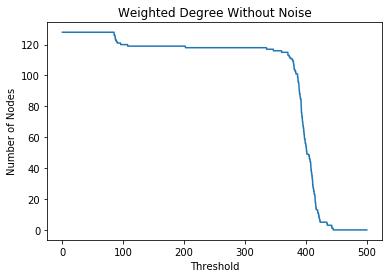

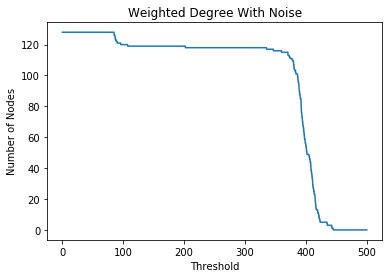

In [6]:
# function counting the number of nodes above a threshold
def thresh_count(arr, thresh):
    return(np.sum(arr > thresh))


def plot_l1_norm(model, title=""):
    # get the dense layer
    dense_layer= model.layers[-3]

    # pull out the weights
    dense_weights = np.array(dense_layer.get_weights())

    # compute the L1 norm for the dense weights
    dense_L1 = np.sum(np.abs(dense_weights[0]), axis = 0)

    # list of thresholds
    thresh_list = np.linspace(0,500, 2000)

    # count the number of nodes for all thresholds
    dense_count = np.array([thresh_count(dense_L1, thresh) for thresh in thresh_list])

    # plot count vs. thresh
    plt.plot(thresh_list, dense_count)
    plt.xlabel("Threshold")
    plt.ylabel("Number of Nodes")
    plt.title(title)
    plt.show()
    
plot_l1_norm(model, title="Weighted Degree Without Noise")
plot_l1_norm(model3, title="Weighted Degree With Noise")

In [7]:
weights = np.abs(np.array(model.layers[-1].get_weights()[0]))
print(weights.shape)
weight_adj_matrix = np.zeros([sum(weights.shape),sum(weights.shape)])
weight_adj_matrix[weights.shape[0]:,:weights.shape[0]] = np.transpose(weights)
print(weight_adj_matrix)

(128, 10)


In [9]:
import bct
# bct.betweenness_wei(weight_adj_matrix)

In [11]:
def weighted_clustering_coeff(G):
    """ Calculates clustering coefficient for a weighted network represented by an adjacency matrix """
    # https://www.researchgate.net/publication/49721057_Competition_for_Popularity_in_Bipartite_Networks
    k = G.shape[0] # assume fully connected
    coeffs = np.zeros((k,))
    for i in range(k):
        for j in range(k):
            for h in range(k):
                coeffs[i] += (G[i,j]*G[i,h]*G[h,j])**(1.0/3.0)
        Gv = np.max(G[i,:])
        coeffs[i] *= 2.0/(k*(k-1)*Gv)
    return coeffs

def calc_clustering_coeff_square(weights):
    """ Calculates clustering coefficients for a bipartite weighted network represented by a weight matrix """
    # Compute the unipartite networks correspondign to the bipartite network
    adj1 = np.matmul(weights, np.transpose(weights))
    adj2 = np.matmul(np.transpose(weights), weights)
    return weighted_clustering_coeff(adj1), weighted_clustering_coeff(adj2)

coeffs1, coeffs2 = calc_clustering_coeff_square(weights)

# print(coeffs1)
# print(coeffs2)

In [14]:
coeffs1, coeffs2 = calc_clustering_coeff_square(weights)

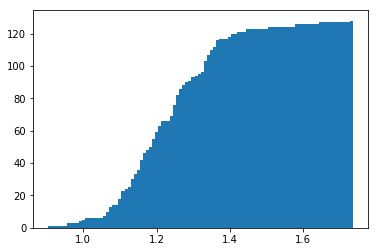

1.2311980519598613


In [18]:
plt.hist(coeffs1, bins=100, cumulative=True)
plt.show()
print(np.average(coeffs1))
# weights_noise = np.abs(np.array(model3.layers[-1].get_weights()[0]))
# coeffs1, coeffs2 = calc_clustering_coeff_square(weights_noise)
# plt.hist(coeffs1, bins=100, cumulative=True)
# plt.show()

In [24]:
from keras import backend as K
# Compute the adjacency matrix of the layer
layer_adj_matrix = np.matmul(weights, np.transpose(weights))

# Find the highest activation image for each node in the first dense layer
from model_generation import generate_data
X_train, X_test, Y_train, Y_test = generate_data()

inp = model.input                                           # input placeholder
outputs = [model.layers[-3].output]          # all layer outputs
functor = K.function([inp]+ [K.learning_phase()], outputs ) # evaluation function

# Testing
test = X_test[:1000]
layer_outs = functor([test, 1.])
repr_indices = np.argmax(layer_outs[0], axis=0)
# print(np.argmax(layer_outs[0],axis=1))

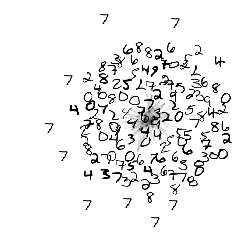

In [27]:
import networkx as nx
from networkx.drawing import spring_layout
#G = nx.Graph(layer_adj_matrix)
G = nx.Graph(layer_adj_matrix, width=layer_adj_matrix)
# nx.drawing.nx_pylab.draw_spring(G, node_size=40)
layout = spring_layout(G)

fig = plt.Figure()
# Generate the image
for i in range(128):
    for j in range(128):
        if layer_adj_matrix[i,j]>0.6:
            pos1 = layout[i]*100
            pos2 = layout[j]*100
            plt.plot([pos1[0], pos2[0]], [pos1[1], pos2[1]], alpha=0.05, color="black")
        
for i in range(128):
    pos = layout[i]*200
    extent = [pos[0]-14, pos[0]+14, pos[1]-14, pos[1]+14]
    img = X_test[repr_indices[i]][0].copy()
#     # add a black border
#     for i in range(len(img)):
#         img[i][0] = 1
#         img[i][-1] = 1
#         for j in range(len(img[0])):
#             img[0][j] = 1
#             img[-1][j] = 1
    img = np.ma.masked_where(img == 0, img)
    plt.imshow(img, interpolation="nearest", extent=extent, cmap="binary")
plt.autoscale()
plt.axis("off")
plt.show()